In [1]:
import pandas as pd
import numpy as np
import random as rnd
import re

# visualization

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from matplotlib import pyplot
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py #visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
from pylab import rcParams
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

C:\Users\rozha\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
#fig_size = plt.rcParams["figure.figsize"]
#fig_size[0] = 9
#fig_size[1] = 6
#plt.rcParams["figure.figsize"] = fig_size

In [3]:
data=pd.read_csv("customer_churn.csv")

In [4]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [5]:
data.describe()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
State             3333 non-null object
Account Length    3333 non-null int64
Area Code         3333 non-null int64
Phone             3333 non-null object
Int'l Plan        3333 non-null object
VMail Plan        3333 non-null object
VMail Message     3333 non-null int64
Day Mins          3333 non-null float64
Day Calls         3333 non-null int64
Day Charge        3333 non-null float64
Eve Mins          3333 non-null float64
Eve Calls         3333 non-null int64
Eve Charge        3333 non-null float64
Night Mins        3333 non-null float64
Night Calls       3333 non-null int64
Night Charge      3333 non-null float64
Intl Mins         3333 non-null float64
Intl Calls        3333 non-null int64
Intl Charge       3333 non-null float64
CustServ Calls    3333 non-null int64
Churn?            3333 non-null object
dtypes: float64(8), int64(8), object(5)
memory usage: 546.9+ KB


In [7]:
data.dtypes

State              object
Account Length      int64
Area Code           int64
Phone              object
Int'l Plan         object
VMail Plan         object
VMail Message       int64
Day Mins          float64
Day Calls           int64
Day Charge        float64
Eve Mins          float64
Eve Calls           int64
Eve Charge        float64
Night Mins        float64
Night Calls         int64
Night Charge      float64
Intl Mins         float64
Intl Calls          int64
Intl Charge       float64
CustServ Calls      int64
Churn?             object
dtype: object

In [8]:
#how many missing values do we have?
missing_val_count_by_column = (data.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Series([], dtype: int64)


we do not have any missing values in this dataset

In [9]:
data.describe(include=['O'])

,State,Phone,Int'l Plan,VMail Plan,Churn?
count,3333,3333,3333,3333,3333
unique,51,3333,2,2,2
top,WV,344-2416,no,no,False.
freq,106,1,3010,2411,2850


the company has its most clients in West Virginia State.

Most of the customers did not escape. 

we can drop the phone number and area code columns as they contain each customer's unique phone number and it's not going to be useful in the analysis. 

In [10]:
data=data.drop(['Area Code','Phone'],axis=1)

In [11]:
data.head()

,State,Account Length,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [12]:
list(data.columns)

['State',
 'Account Length',
 "Int'l Plan",
 'VMail Plan',
 'VMail Message',
 'Day Mins',
 'Day Calls',
 'Day Charge',
 'Eve Mins',
 'Eve Calls',
 'Eve Charge',
 'Night Mins',
 'Night Calls',
 'Night Charge',
 'Intl Mins',
 'Intl Calls',
 'Intl Charge',
 'CustServ Calls',
 'Churn?']

In [13]:
data.columns=['State','AccountLength','Intplan','VMailPlan','VMailMessage','DayMins','DayCalls','DayCharge','EveMins','EveCalls','EveCharge','NightMins','NightCalls','NightCharge','IntlMins','IntlCalls','IntlCharge','CustServCalls','Churn']

In [14]:
data.head()

,State,AccountLength,Intplan,VMailPlan,VMailMessage,DayMins,DayCalls,DayCharge,EveMins,EveCalls,EveCharge,NightMins,NightCalls,NightCharge,IntlMins,IntlCalls,IntlCharge,CustServCalls,Churn
0,KS,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


## assumptions
### Correlating.
We want to know how well does each feature correlate with Churn.

### Completing.
We do not have any null value in this data set so we do not need to complete any of the variables. 


### Correcting.
phone number and area code had been dropped from our analysis as there may not be a correlation between phone number and churn.

State feature may be dropped as it does not contribute to churn.


### Creating.
We may want to create a new feature called total charges based on partial charges to get total revenue of the company from each customer.

We may want to create a new feature called total calls based on partial calls to get total calls of each customer.

We may want to create a new feature called total minutes based on partial minutes each customer talked to get total usage of the each customer.

We may want to change the Intplan,VMailPlan,Churn from yes/no to 0 and 1 categorical variables.


### Classifying.
Then we will classify the model 


In [15]:
data['Churn'].value_counts(sort = False)

False.    2850
True.      483
Name: Churn, dtype: int64

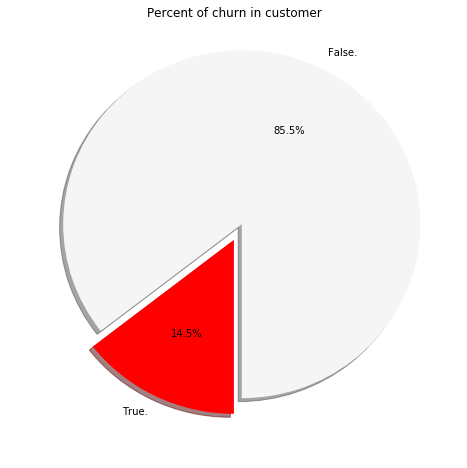

In [16]:
labels =data['Churn'].value_counts(sort = True).index
sizes = data['Churn'].value_counts(sort = True)


colors = ["whitesmoke","red"]
explode = (0.1,0)  # explode 1st slice
 
rcParams['figure.figsize'] = 8,8
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)

plt.title('Percent of churn in customer')
plt.show()

14.5% of customers have churned

In [17]:
data['Churn'] = data['Churn'].map(lambda s :1  if s =='True.' else 0)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
State            3333 non-null object
AccountLength    3333 non-null int64
Intplan          3333 non-null object
VMailPlan        3333 non-null object
VMailMessage     3333 non-null int64
DayMins          3333 non-null float64
DayCalls         3333 non-null int64
DayCharge        3333 non-null float64
EveMins          3333 non-null float64
EveCalls         3333 non-null int64
EveCharge        3333 non-null float64
NightMins        3333 non-null float64
NightCalls       3333 non-null int64
NightCharge      3333 non-null float64
IntlMins         3333 non-null float64
IntlCalls        3333 non-null int64
IntlCharge       3333 non-null float64
CustServCalls    3333 non-null int64
Churn            3333 non-null int64
dtypes: float64(8), int64(8), object(3)
memory usage: 494.8+ KB


In [19]:
data.head(10)

,State,AccountLength,Intplan,VMailPlan,VMailMessage,DayMins,DayCalls,DayCharge,EveMins,EveCalls,EveCharge,NightMins,NightCalls,NightCharge,IntlMins,IntlCalls,IntlCharge,CustServCalls,Churn
0,KS,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,AL,118,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
6,MA,121,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
7,MO,147,yes,no,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,0
8,LA,117,no,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
9,WV,141,yes,yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0


Plan : Customer Plan (yes, no)
create new binary columns out of these two columns


In [20]:
data['Intplan'] = data['Intplan'].map(lambda s :1  if s =='yes' else 0)
data['Intplan'].value_counts()

0    3010
1     323
Name: Intplan, dtype: int64

In [21]:
data['VMailPlan'] = data['VMailPlan'].map(lambda s :1  if s =='yes' else 0)
data['VMailPlan'].value_counts()

0    2411
1     922
Name: VMailPlan, dtype: int64

In [22]:
data['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [23]:
data['totalcharge']=data['DayCharge']+data['EveCharge']+data['EveCharge']+data['IntlCharge']

In [24]:
data['totalmins']=data['DayMins']+data['EveMins']+data['NightMins']+data['IntlMins']

In [25]:
data['totalcalls']=data['DayCalls']+data['EveCalls']+data['NightCalls']+data['IntlCalls']

In [26]:
data.head()

,State,AccountLength,Intplan,VMailPlan,VMailMessage,DayMins,DayCalls,DayCharge,EveMins,EveCalls,...,NightCalls,NightCharge,IntlMins,IntlCalls,IntlCharge,CustServCalls,Churn,totalcharge,totalmins,totalcalls
0,KS,128,0,1,25,265.1,110,45.07,197.4,99,...,91,11.01,10.0,3,2.70,1,0,81.33,717.2,303
1,OH,107,0,1,26,161.6,123,27.47,195.5,103,...,103,11.45,13.7,3,3.70,1,0,64.41,625.2,332
2,NJ,137,0,0,0,243.4,114,41.38,121.2,110,...,104,7.32,12.2,5,3.29,0,0,65.27,539.4,333
3,OH,84,1,0,0,299.4,71,50.90,61.9,88,...,89,8.86,6.6,7,1.78,2,0,63.20,564.8,255
4,OK,75,1,0,0,166.7,113,28.34,148.3,122,...,121,8.41,10.1,3,2.73,3,0,56.29,512.0,359


In [27]:
data.describe()

,AccountLength,Intplan,VMailPlan,VMailMessage,DayMins,DayCalls,DayCharge,EveMins,EveCalls,EveCharge,...,NightCalls,NightCharge,IntlMins,IntlCalls,IntlCharge,CustServCalls,Churn,totalcharge,totalmins,totalcalls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,...,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,0.096910,0.276628,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,...,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914,67.493969,591.864776,305.137114
std,39.822106,0.295879,0.447398,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,...,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067,12.707134,89.954251,34.448164
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000,24.450000,284.300000,191.000000
25%,74.000000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,...,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000,59.290000,531.500000,282.000000
50%,101.000000,0.000000,0.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,...,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000,67.400000,593.600000,305.000000
75%,127.000000,0.000000,1.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,...,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000,76.090000,652.400000,328.000000
max,243.000000,1.000000,1.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,...,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000,112.070000,885.000000,416.000000


Half of the clients remain in the company for more than 101 months

The average total revenue generated per customer is 67.49

Each customer had an average 305 calls in the course of using the service of this company 

Half of the clients has called the customer service at least one time


Text(0.5,1,'Total account length by customers in each state')

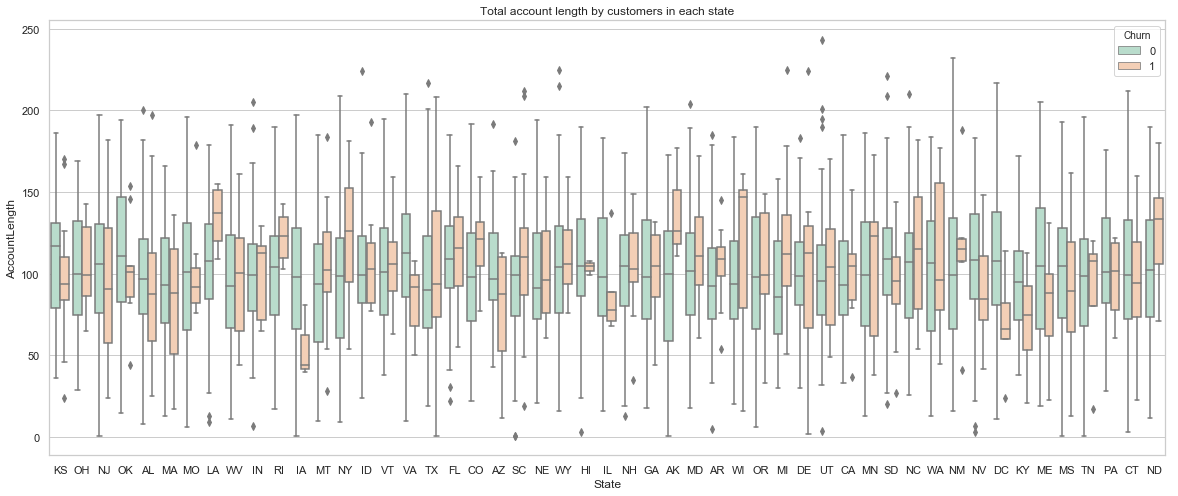

In [28]:
plt.figure(figsize = (20,8))

sns.set(style = 'whitegrid')
sns.boxplot(x = data.State, y = data.AccountLength, hue = data.Churn,palette = "Pastel2")

plt.title('Total account length by customers in each state')

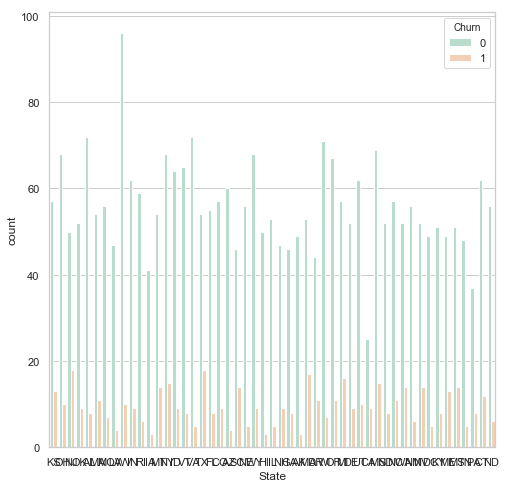

In [29]:
sns.set(style = 'whitegrid')
sns.countplot(data.State, hue = data.Churn,palette = "Pastel2" )

West Virgina State is the most populated state by the customers. 

There is no evident relationship between different states and the customer's leave. 

We can drop this column too

In [30]:
numerics = data[['AccountLength','totalcharge', 'totalmins', 'Churn']]

<Figure size 1080x720 with 0 Axes>

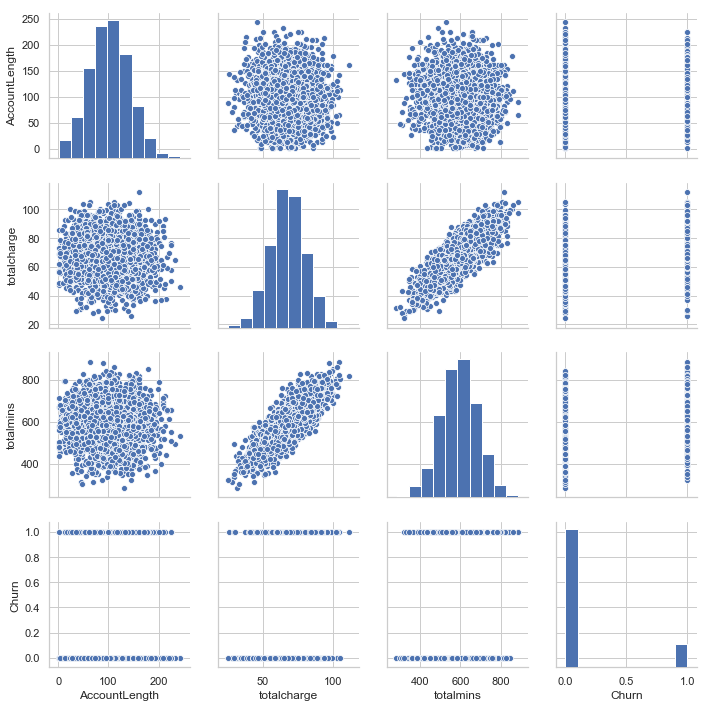

In [31]:
plt.figure(figsize = (15,10))
sns.pairplot(numerics)

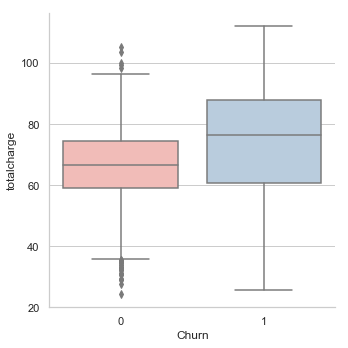

In [32]:
g = sns.factorplot(x="Churn", y = "totalcharge",data = data, kind="box", palette = "Pastel1")

According to above plot, High totalcharges may affect to churn probability.
And seems like customer will not churn if they have lower amounts in totalcharges

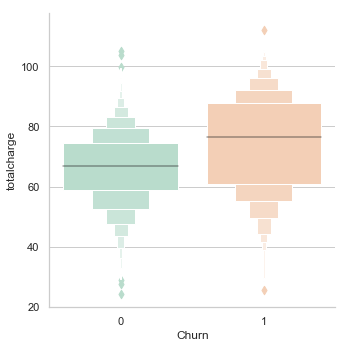

In [33]:
g = sns.factorplot(y="totalcharge",x="Churn",data=data,kind="boxen", palette = "Pastel2")

From boxen plot, most of the customers that left have more than 60 in total chrage.
In range of 60 to 85, population of loyal customer is around half of the population of customers who left.

Text(0.5,1,'Relationship between total calls and total charge')

<Figure size 1440x1440 with 0 Axes>

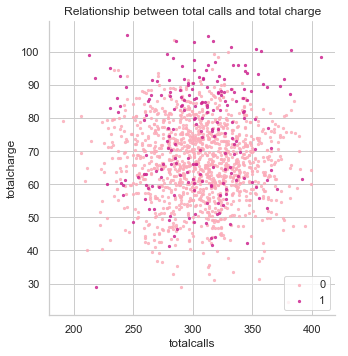

In [34]:
plt.figure(figsize = (20,20))
sample = data.sample(n=1500)
#plt.plot(x = 'totalcalls', y = 'totalcharge', data = sample, markersize=0.7)
sns.lmplot( x="totalcalls", y="totalcharge", data=sample, fit_reg=False, hue='Churn', legend=False, scatter_kws={"s": 5},palette="RdPu")
plt.legend(loc='lower right')
ax = plt.gca()
ax.set_title('Relationship between total calls and total charge')

Text(0.5,1,'Relationship between total minutes and total charge')

<Figure size 1440x1440 with 0 Axes>

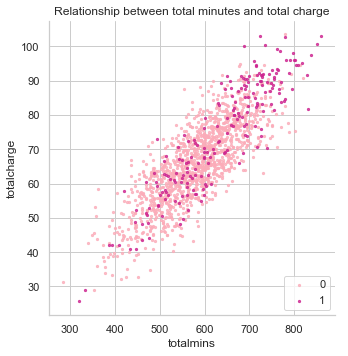

In [35]:
plt.figure(figsize = (20,20))
sample = data.sample(n=1500)
#plt.plot(x = 'totalcalls', y = 'totalcharge', data = sample, markersize=0.7)
sns.lmplot( x="totalmins", y="totalcharge", data=sample, fit_reg=False, hue='Churn', legend=False, scatter_kws={"s": 5},palette="RdPu")
plt.legend(loc='lower right')
ax = plt.gca()
ax.set_title('Relationship between total minutes and total charge')

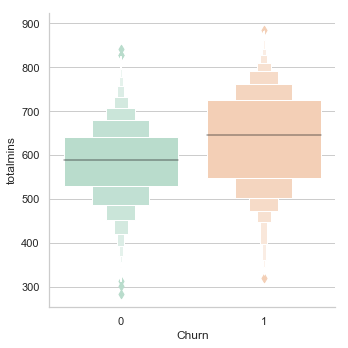

In [36]:
g = sns.factorplot(y="totalmins",x="Churn",data=data,kind="boxen", palette = "Pastel2")

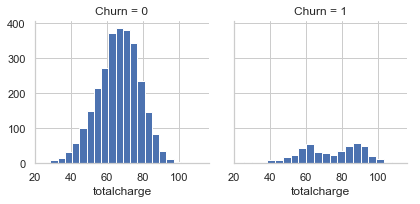

In [37]:
g = sns.FacetGrid(data, col='Churn')
g.map(plt.hist, 'totalcharge', bins=20)

From the two scatters plot above we found out that number of calls that each customer made does not have a direct relationship with the company's revenue from that customer. However Total minutes that each customer talks on the phone have a linear relationship with the total charges.

We already found out that customers who left the company, used the services more. and most of them have used the service for more than 550 minutes. And the population of the customers who left the company and have used the service between 550-700 minutes are nearly twice the population that stayed. 

So we can have this assumption that the reason why the customers are leaving are the quality or the high cost of the services. 


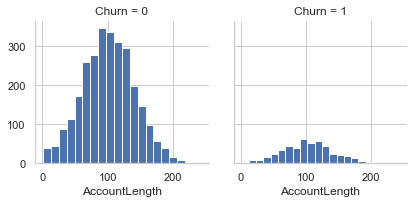

In [38]:
g = sns.FacetGrid(data, col='Churn')
g.map(plt.hist, 'AccountLength', bins=20)

We can see that the distribution of the Account Length of customers that left or were loyal are somehow similar. The frequency of the customers who left are less than loyal customers and that's the reason why the bins are shorter in right histogram above. Most of the customers stayed with the company between 60 to 120 months. 


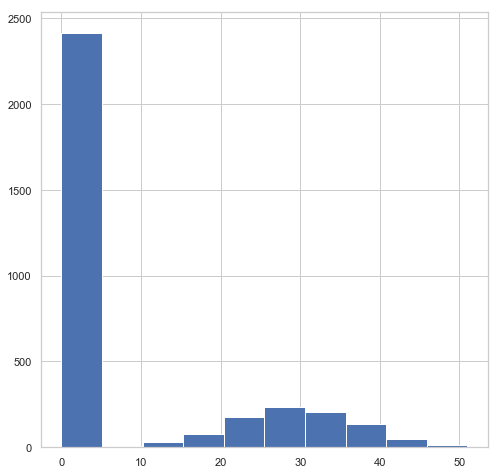

In [39]:
plt.figure(figsize = (8,8))
data['VMailMessage'].hist()

(5, 55)

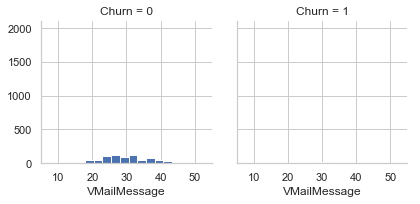

In [40]:
g = sns.FacetGrid(data, col='Churn')
g.map(plt.hist, 'VMailMessage', bins=20)
plt.xlim(xmin=5, xmax = 55)

As we can see in the distribution of the Voicemail messages, most of the customers have no voicemail messages. and there is no relationship between voicemail messages and churn

In [41]:
data['VMailMessage'].describe()

count    3333.000000
mean        8.099010
std        13.688365
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        51.000000
Name: VMailMessage, dtype: float64

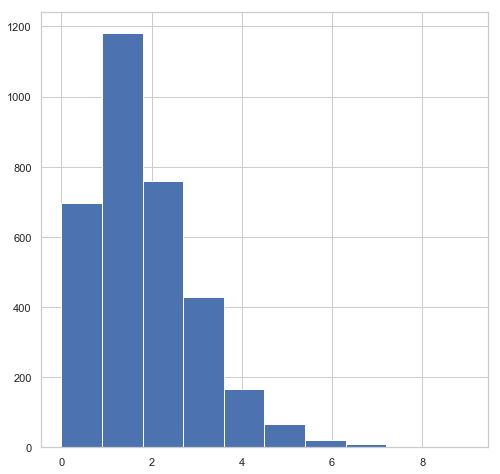

In [42]:
plt.figure(figsize = (8,8))
data['CustServCalls'].hist()

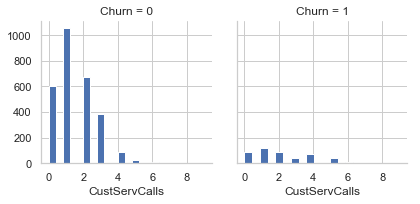

In [43]:
g = sns.FacetGrid(data, col='Churn')
g.map(plt.hist, 'CustServCalls', bins=20)

In [44]:
pd.crosstab(data.Churn, data.CustServCalls,
            margins = True)

CustServCalls,0,1,2,3,4,5,6,7,8,9,All
Churn,,,,,,,,,,,
0,605,1059,672,385,90,26,8,4,1,0,2850
1,92,122,87,44,76,40,14,5,1,2,483
All,697,1181,759,429,166,66,22,9,2,2,3333


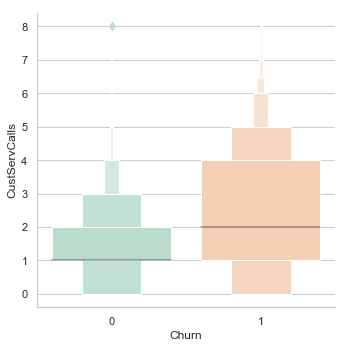

In [45]:
g = sns.factorplot(y="CustServCalls",x="Churn",data=data,kind="boxen", palette = "Pastel2")

most of the customers had at least one call to customer service

most of the customers who escaped had at leat one to four call to customer service.

So we can see that there is clearly an influence here. So we have to analyse this factor more

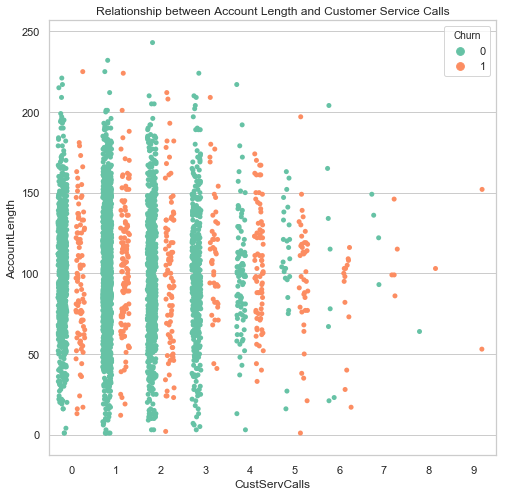

In [46]:
ax = plt.gca()
plt.rcParams['figure.figsize'] = (20.0, 20.0)
ax.set_title('Relationship between Account Length and Customer Service Calls')
p=sns.stripplot(data.CustServCalls, data.AccountLength, hue=data.Churn,jitter=0.2, dodge=True,size=5,palette="Set2")

Text(0.5,1,'Total Revenue by customer service callers')

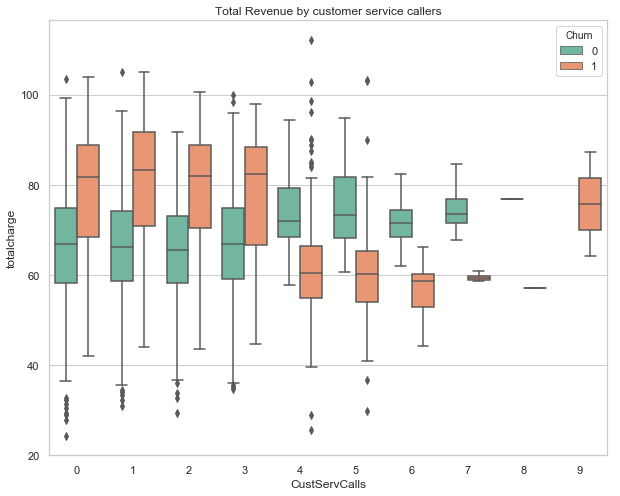

In [47]:
plt.figure(figsize = (10,8))

sns.set(style = 'whitegrid')
sns.boxplot(x = data.CustServCalls, y = data.totalcharge, hue = data.Churn,palette="Set2")

plt.title('Total Revenue by customer service callers')

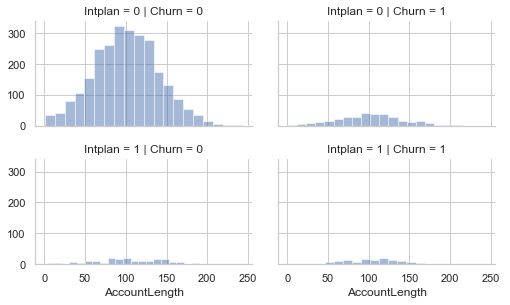

In [48]:
grid = sns.FacetGrid(data, col='Churn', row='Intplan', height=2.2, aspect=1.6)
grid.map(plt.hist, 'AccountLength', alpha=.5, bins=20)
grid.add_legend();

In [49]:
data[['Intplan', 'Churn']].groupby(['Intplan'], as_index=False).mean().sort_values(by='Churn', ascending=False)

,Intplan,Churn
1,1,0.424149
0,0,0.114950


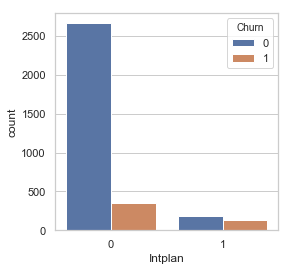

In [50]:
plt.figure(figsize = (4,4))
sns.set(style = 'whitegrid')
sns.countplot(data.Intplan, hue = data.Churn )

In [51]:
pd.crosstab(data.Churn, data.Intplan,
            margins = True)

Intplan,0,1,All
Churn,,,
0,2664,186,2850
1,346,137,483
All,3010,323,3333


Most of the customers do not have the international plan(nearly 90%).

Most of the customers who left did not have the international plan either.

It does not seem that having international plan has any influence on the escape of the customers.

In [52]:
data[['VMailPlan', 'Churn']].groupby(['VMailPlan'], as_index=False).mean().sort_values(by='Churn', ascending=False)

,VMailPlan,Churn
0,0,0.167151
1,1,0.086768


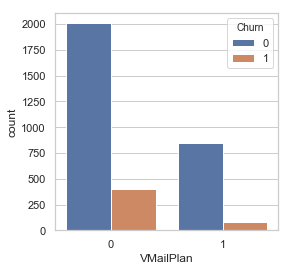

In [53]:
plt.figure(figsize = (4,4))
sns.set(style = 'whitegrid')
sns.countplot(data.VMailPlan, hue = data.Churn )

In [54]:
pd.crosstab(data.Churn, data.VMailPlan,
            margins = True)

VMailPlan,0,1,All
Churn,,,
0,2008,842,2850
1,403,80,483
All,2411,922,3333


Most of the customers do not have the Voicemail plan.

Most of the customers who left did not have the voicemail plan either.

It does not seem that having voicemail plan has any influence on the escape of the customers.

Text(0.5,1,'Relationship between loyalty months and total revenue')

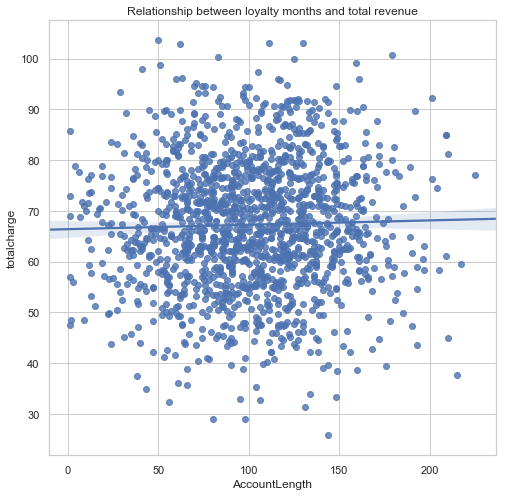

In [55]:
plt.figure(figsize = (8,8))

sns.regplot(x = 'AccountLength', y = 'totalcharge', data = sample)

plt.title('Relationship between loyalty months and total revenue')

In [56]:
cor = data.corr()

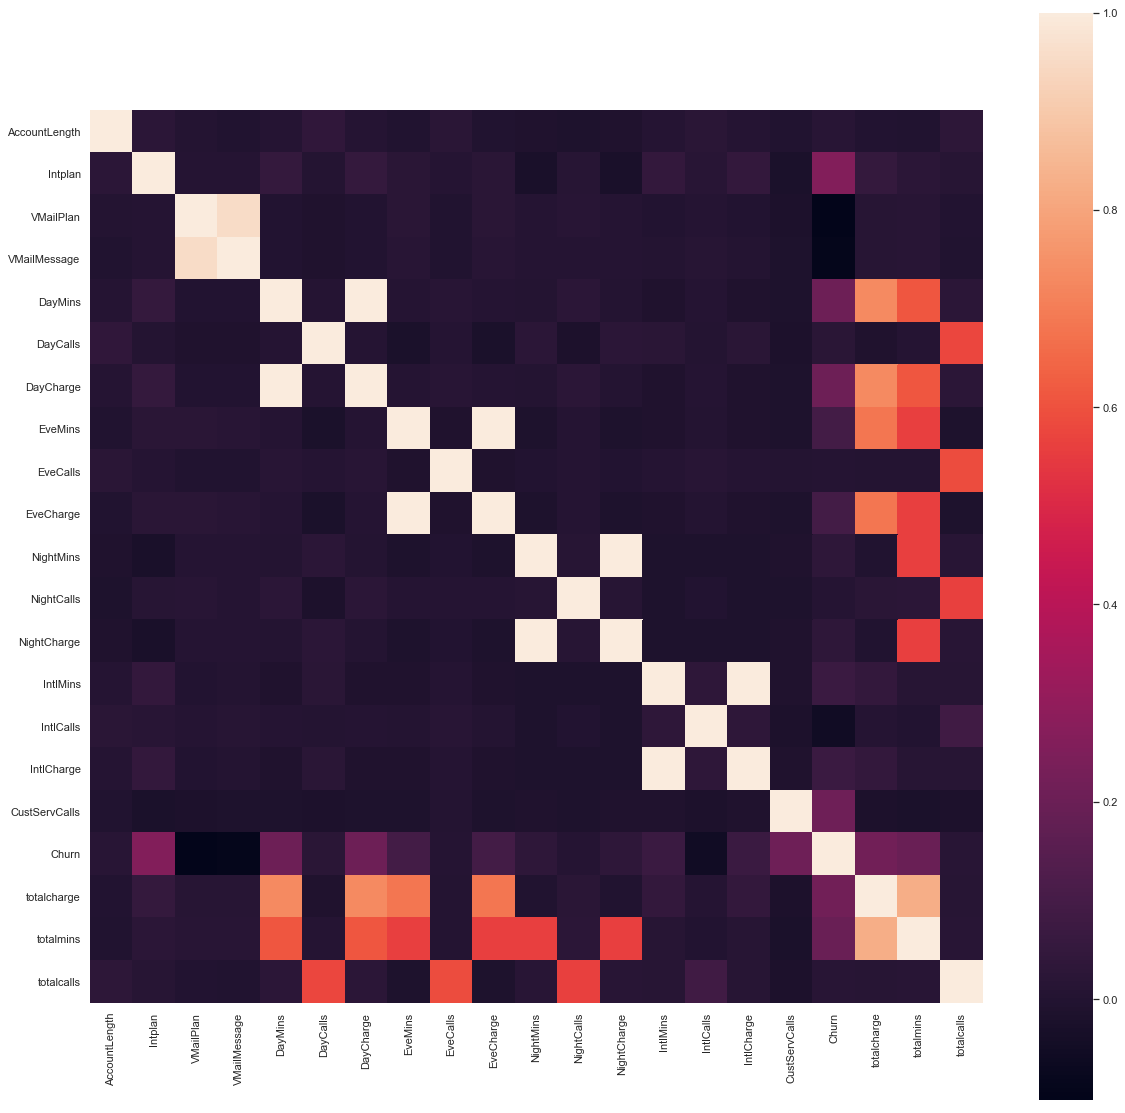

In [57]:
plt.figure(figsize = (20,20))

sns.heatmap(cor, square = True) 

In [58]:
data.head()

,State,AccountLength,Intplan,VMailPlan,VMailMessage,DayMins,DayCalls,DayCharge,EveMins,EveCalls,...,NightCalls,NightCharge,IntlMins,IntlCalls,IntlCharge,CustServCalls,Churn,totalcharge,totalmins,totalcalls
0,KS,128,0,1,25,265.1,110,45.07,197.4,99,...,91,11.01,10.0,3,2.70,1,0,81.33,717.2,303
1,OH,107,0,1,26,161.6,123,27.47,195.5,103,...,103,11.45,13.7,3,3.70,1,0,64.41,625.2,332
2,NJ,137,0,0,0,243.4,114,41.38,121.2,110,...,104,7.32,12.2,5,3.29,0,0,65.27,539.4,333
3,OH,84,1,0,0,299.4,71,50.90,61.9,88,...,89,8.86,6.6,7,1.78,2,0,63.20,564.8,255
4,OK,75,1,0,0,166.7,113,28.34,148.3,122,...,121,8.41,10.1,3,2.73,3,0,56.29,512.0,359


In [59]:
ndata=data.drop(['State','VMailMessage'],axis=1)

In [60]:
# create training and testing vars
y=ndata['Churn']
X_train, X_test, y_train, y_test = train_test_split(ndata, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [61]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)
print (X_val.shape, y_val.shape)

(2132, 20) (2132,)
(667, 20) (667,)
(534, 20) (534,)


In [63]:

from sklearn.model_selection import train_test_split
train, test = train_test_split(ndata, test_size = 0.2)
 
train_y = train['Churn']
test_y = test['Churn']
 
train_x = train
train_x.pop('Churn')
test_x = test
test_x.pop('Churn')

1426    0
2812    0
760     0
77      1
3095    0
109     0
930     0
1785    0
1400    0
3277    0
2998    0
324     0
3139    0
986     0
1089    0
252     0
2528    0
2838    0
2386    1
2692    0
3067    0
186     0
612     0
2084    0
722     0
3118    0
1050    0
2898    0
2390    0
2095    0
       ..
753     0
942     0
2678    0
1369    0
513     0
1650    0
1965    1
2536    1
10      1
2900    1
2318    0
543     0
2446    0
2743    0
800     0
693     0
471     0
1442    1
2353    0
1332    0
111     0
2948    0
1060    0
984     0
2960    1
154     0
216     0
2471    0
1881    1
2403    0
Name: Churn, Length: 667, dtype: int64

Intercept: [-5.30175394]
Regression: [[-3.69193280e-04  1.98397317e+00 -9.20464539e-01 -2.88422592e-03
   2.11325267e-02 -8.65976077e-03 -9.79625779e-03  1.81710182e-02
  -7.44103537e-03 -1.32124782e-02  1.94860636e-02  3.09672809e-03
   4.03434232e-02 -8.21869319e-02  3.14184807e-02  4.75461762e-01
   7.87664921e-03  1.44504613e-02 -2.33973233e-02]]
Accuracy of logistic regression classifier on test set: 0.86
             precision    recall  f1-score   support

          0       0.89      0.97      0.92       582
          1       0.39      0.14      0.21        85

avg / total       0.82      0.86      0.83       667



Text(0.5,156.5,'Predicted label')

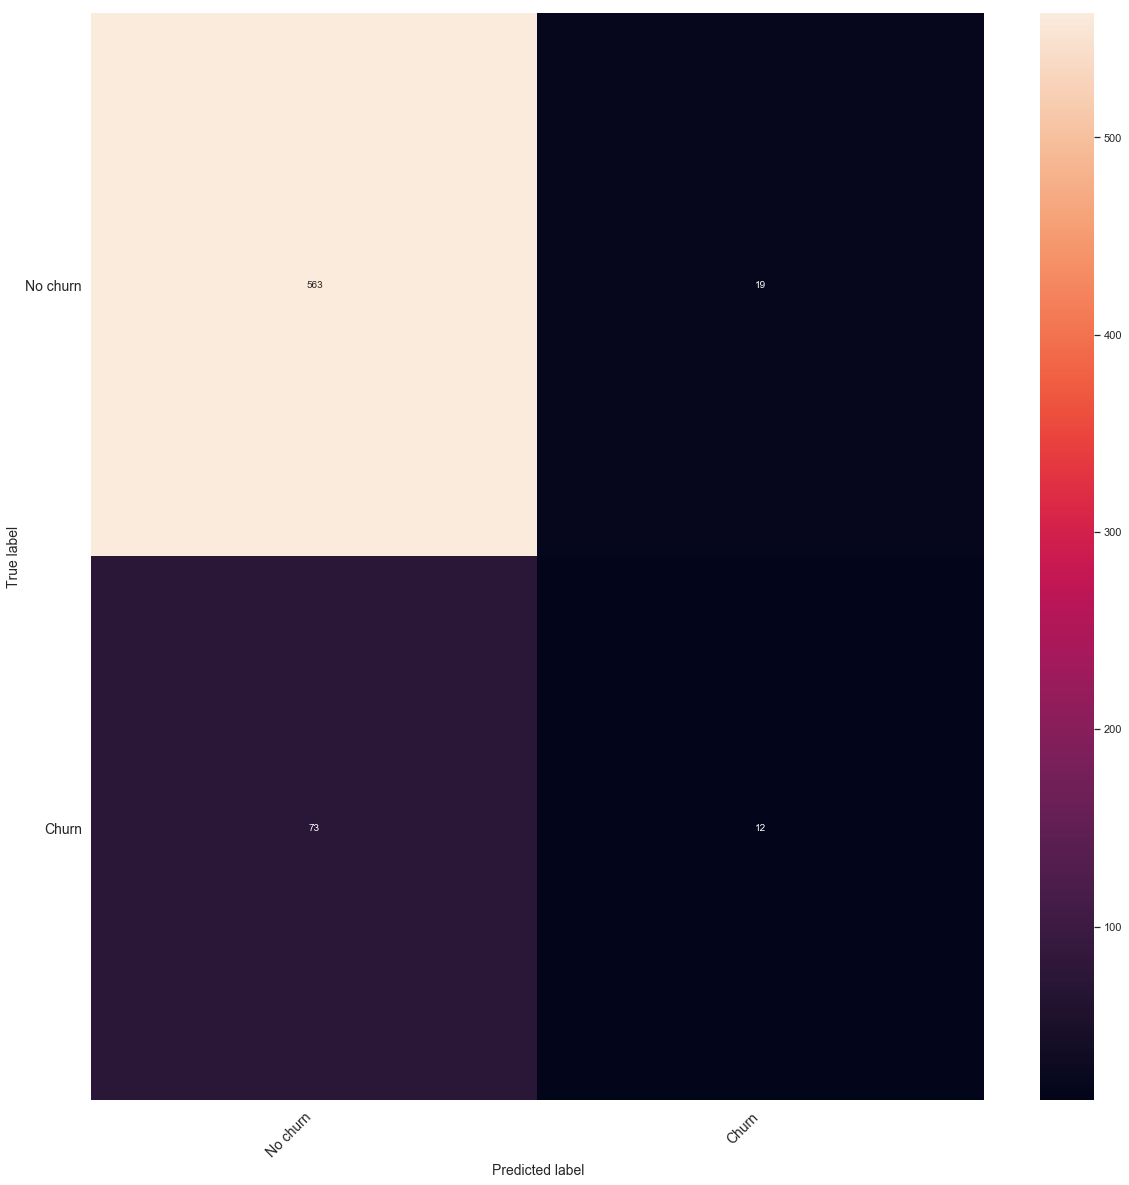

In [64]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
 
logisticRegr = LogisticRegression()
logisticRegr.fit(X=train_x, y=train_y)
 
test_y_pred = logisticRegr.predict(test_x)
confusion_matrix = confusion_matrix(test_y, test_y_pred)
print('Intercept: ' + str(logisticRegr.intercept_))
print('Regression: ' + str(logisticRegr.coef_))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logisticRegr.score(test_x, test_y)))
print(classification_report(test_y, test_y_pred))
 
confusion_matrix_df = pd.DataFrame(confusion_matrix, ('No churn', 'Churn'), ('No churn', 'Churn'))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 10}, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)


We got 86% classification accuracy from our logistic regression classifier. But the precision and recall for predictions in the positive class (churn) are relatively low, which suggests our data set may be imbalanced.

## Handle imbalanced classes

In [65]:
ndata['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

The class for churn is only around 16% of the total population of samples. There is a real risk that a model trained on this data may only make too many predictions in favour of the majority class. There are a number of techniques for handling imbalanced classes:

To balance the data set, we can randomly duplicate observations from the minority class. This is also known as re sampling with replacement:

In [66]:

from sklearn.utils import resample
 
data_majority = ndata[ndata['Churn']==0]
data_minority = ndata[ndata['Churn']==1]
 
data_minority_upsampled = resample(data_minority,
replace=True,
n_samples=5174, #same number of samples as majority classe
random_state=1) #set the seed for random resampling
# Combine resampled results
data_upsampled = pd.concat([data_majority, data_minority_upsampled])
 
data_upsampled['Churn'].value_counts()

1    5174
0    2850
Name: Churn, dtype: int64

Now that we have a 1:1 ratio for our classes, let’s train another logistic regression model:

In [67]:

train, test = train_test_split(data_upsampled, test_size = 0.25)
 
train_y_upsampled = train['Churn']
test_y_upsampled = test['Churn']
 
train_x_upsampled = train
train_x_upsampled.pop('Churn')
test_x_upsampled = test
test_x_upsampled.pop('Churn')
 
logisticRegr_balanced = LogisticRegression()
logisticRegr_balanced.fit(X=train_x_upsampled, y=train_y_upsampled)
 
test_y_pred_balanced = logisticRegr_balanced.predict(test_x_upsampled)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logisticRegr_balanced.score(test_x_upsampled, test_y_upsampled)))
print(classification_report(test_y_upsampled, test_y_pred_balanced))

Accuracy of logistic regression classifier on test set: 0.79
             precision    recall  f1-score   support

          0       0.73      0.62      0.67       697
          1       0.81      0.88      0.84      1309

avg / total       0.78      0.79      0.78      2006



The overall accuracy of the model has decreased to 78%, but the precision and recall scores for predicting a churn have improved. 

### Decision Trees

In [74]:
import os
os.environ["PATH"] += os.pathsep + r'C:\Users\rozha\Anaconda3\Library\bin\graphviz'

In [75]:
from sklearn import tree
from sklearn import tree
import graphviz 
 
# Create each decision tree (pruned and unpruned)
decisionTree_unpruned = tree.DecisionTreeClassifier()
decisionTree = tree.DecisionTreeClassifier(max_depth = 4)
 
# Fit each tree to our training data
decisionTree_unpruned = decisionTree_unpruned.fit(X=train_x, y=train_y)
decisionTree = decisionTree.fit(X=train_x, y=train_y)
 
# Generate PDF visual of decision tree
churnTree = tree.export_graphviz(decisionTree, out_file=None, 
                         feature_names = list(train_x.columns.values),  
                         class_names = ['No churn', 'Churn'],
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(churnTree)
graph.render('decision_tree.gv', view=True)


'decision_tree.gv.pdf'

In [76]:
test_y_pred_dt = decisionTree.predict(test_x)
print('Accuracy of decision tree classifier on test set: {:.2f}'.format(decisionTree.score(test_x, test_y)))

Accuracy of decision tree classifier on test set: 0.93


### Random forests


In [77]:

from sklearn.ensemble import RandomForestClassifier
randomForest = RandomForestClassifier()
randomForest.fit(train_x, train_y)
print('Accuracy of random forest classifier on test set: {:.2f}'.format(randomForest.score(test_x, test_y)))

Accuracy of random forest classifier on test set: 0.95
